# Asexual Genetic Algorithm 

The AGA is a convenient algorithm for combinatorial or ordering problems. Such problems tend to have very poor computational complexity grown as the size of the input increases, so it's useful to have an algorithm which can quickly find good (but not necessarily optimal) solutions to these kinds of problems. We implement the algorithm and deploy it on the travelling salesman problem. We also show the TSP solution from random search  for the same number of function calls, and you'll see that ASG does much better.

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
from math import hypot
from tqdm import tqdm

## Random Search

In [2]:
class RandomSearch:
    def __init__(
        self,
        N
    ):
        self.N = N
        
    def generateRandomHypothesis(self):
        output = [c for c in range(self.N)]
        r.shuffle(output)
        return(output)
    
    def optimize(self,
                objectiveFunction,
                numIterations = 25000):
        bestX = None
        bestY = -float("inf")
        for i in range(numIterations):
            newX = self.generateRandomHypothesis()
            newY = objectiveFunction(newX)
            if newY > bestY:
                bestX = newX
                bestY = newY
        return(bestX)

## Asexual Genertic Algorithm (Ordering)

A lot of ordering problems have very poor big-O, meaning that random search is unlikely to perform well for large N. The asexual genertic algorithm is a very simple algorithm that lets us achieve more rapid improvement for less compute for many kinds of problems.

In [3]:
class AsexualGeneticAlgorithm:
    def __init__(
        self,
        N,
        objectiveFunction,
        populationSize = 25,
        mutationMax = 4
    ):
        self.N = N
        self.populationSize = populationSize
        self.objectiveFunction = objectiveFunction
        self.mutationMax = mutationMax
        
    def generateRandomHypothesis(self):
        output = [c for c in range(self.N)]
        r.shuffle(output)
        return(output)

    def generateInitialPopulation(self):
        genome = [self.generateRandomHypothesis() for c in range(self.populationSize)]
        return([[genes, self.objectiveFunction(genes)] for genes in genome])

    def mutateOnce(self, genes):
        i = r.randint(0, len(genes) - 1)
        j = r.randint(0, len(genes) - 1)
        while i == j:
            j = r.randint(0, len(genes) - 1)
        geneI = genes[i]
        geneJ = genes[j]
        output = genes
        output[i] = geneJ
        output[j] = geneI
        return(output)

    def mutateFully(self, genes):
        output = [gene for gene in genes]
        for i in range(r.randint(1, self.mutationMax)):
            output = self.mutateOnce(output)
        return([output, self.objectiveFunction(output)])
    
    def optimize(self, numIterations = 2500):
        population = self.generateInitialPopulation()
        bestX = None
        bestY = -float("inf")
        for individual in population:
            if individual[1] > bestY:
                bestY = individual[1]
                bestX = individual[0]
        for i in tqdm(range(numIterations)):
            reproducingIndividual = r.choice(population)
            newIndividual = self.mutateFully(reproducingIndividual[0])
            stoppingCondition = False
            j = 0
            while not stoppingCondition:
                if population[j][1] < newIndividual[1]:
                    population[j] = newIndividual
                    stoppingCondition = True
                    if newIndividual[1] > bestY:
                        bestY = newIndividual[1]
                        bestX = newIndividual[0]
                else:
                    j += 1
                    if j == len(population):
                        stoppingCondition = True
        return(bestX)

## Travelling Salesman

A classic of optimization, the challenge is this: we have N towns in (-R, R), and must travel to all of the towns starting from any town we choose, and return to our starting town. What is the most efficient order to travel through all the towns such that we minimize our total distance travelled?

Town: 0 [-1.6629443107019188, -8.785359549952007]
Town: 1 [-3.852301090770802, 8.644980933698953]
Town: 2 [4.0902780699546035, -7.931012318170632]
Town: 3 [-7.539160541556633, 0.20543896890537283]
Town: 4 [7.043005622332835, -9.835850884661738]
Town: 5 [3.600364459933054, -7.723837118546313]
Town: 6 [-8.164203508707972, 5.131369375788655]
Town: 7 [1.32733318179719, 3.3746786537388207]
Town: 8 [1.2211487262895542, 8.512268652617614]
Town: 9 [8.605567932091333, -5.565264872011221]
Town: 10 [3.090825950721076, -7.652951108861883]
Town: 11 [-3.846922627390102, 1.1653972024300892]
Town: 12 [5.7285684615429755, 9.468069875423854]
Town: 13 [3.2708862954711133, -9.715227248793703]
Town: 14 [-1.3770084731582148, 9.198407327351632]
Town: 15 [-5.88392056993608, -9.143146184607318]
Town: 16 [8.075651515540287, 7.348504487027235]
Town: 17 [-4.368322031260556, -3.5016137618799785]
Town: 18 [8.248606563980228, -1.2526023536798458]
Town: 19 [4.805820624966014, -9.502623497636382]
Town: 20 [9.437758453

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 37262.13it/s]


Path: [20, 16, 12, 23, 24, 18, 22, 11, 7, 14, 8, 1, 21, 6, 3, 17, 15, 0, 13, 19, 2, 4, 5, 10, 9] Total Distance Travelled: 113.37610472063619

RS
Path: [1, 12, 3, 15, 13, 11, 23, 22, 21, 14, 8, 18, 4, 9, 24, 20, 16, 17, 0, 10, 19, 2, 5, 6, 7] Total Distance Travelled: 201.63986412257336


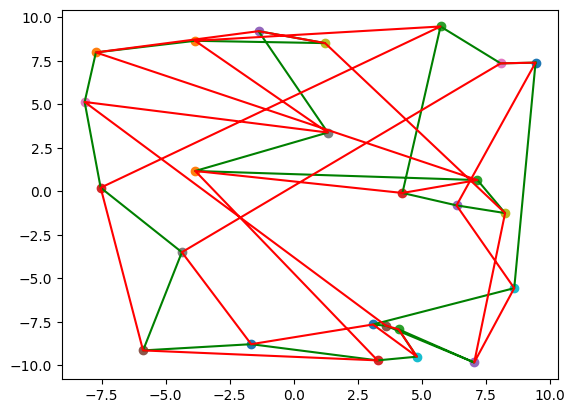

In [8]:
N = 25
R = 10

def travellingSalesmanSetup(N):
    return([[r.uniform(-R, R), r.uniform(-R, R)] for c in range(N)])

towns = travellingSalesmanSetup(N)
for i in range(N):
    print("Town:", str(i), towns[i])
for i in range(len(towns)):
    town = towns[i]
    plt.scatter(town[0], town[1])

def salesmanReward(x):
    d = 0
    for i in range(len(x)):
        a = towns[x[i]]
        b = towns[x[(i + 1) % len(x)]]
        d += hypot(b[0] - a[0], b[1] - a[1])
    return(-d)

print("ASG")
asg = AsexualGeneticAlgorithm(N, salesmanReward, mutationMax = 2)
path = asg.optimize(numIterations = 10 ** 4)
print("Path:", path, "Total Distance Travelled:", -salesmanReward(path))
xs = [towns[i][0] for i in path] + [towns[path[0]][0]]
ys = [towns[i][1] for i in path] + [towns[path[0]][1]]
plt.plot(xs, ys, color = "Green", label = "ASG")
print("")
print("RS")
rs = RandomSearch(N)
path = rs.optimize(salesmanReward, numIterations = 10 ** 4)
print("Path:", path, "Total Distance Travelled:", -salesmanReward(path))
xs = [towns[i][0] for i in path] + [towns[path[0]][0]]
ys = [towns[i][1] for i in path] + [towns[path[0]][1]]
plt.plot(xs, ys, color = "Red", label = "RS")
plt.show()